In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt



In [2]:
# set up environment
dim = 2
grid_size = {'x': 20, 'y': 20}
domain_size = {'x': 20, 'y': 20}

# boundary_condition
# constant boundary condition
bc_left = 0
bc_right = 0
bc_top = 0
bc_bottom = 0

delta_x = domain_size['x'] / grid_size['x']
delta_y = domain_size['y'] / grid_size['y'] 

alpha_x = np.random.random((grid_size['x'],grid_size['y']))
alpha_y = np.ones((grid_size['x'],grid_size['y']))

time_step = 0.1

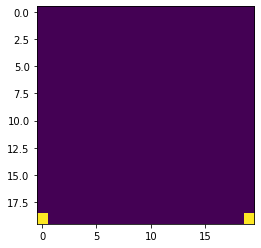

In [3]:
# initialize environment with start values
C_t = np.zeros((grid_size['x'],grid_size['y']))
C_t[19,0] = 2000
C_t[19,19] = 2000


plt.imshow(C_t, vmin=0, vmax=2000)
plt.show()

In [4]:
# calculate mean between two cells
def alpha_interblock(alpha1, alpha2, harmonic=True):
    if not harmonic:
        return 0.5 * (alpha1 + alpha2)
    else:
        return 2 / ((1/alpha1) + (1/alpha2))

In [5]:
def sub(delta_t, delta_x):
    return delta_t / (2 * delta_x**2)

In [15]:
# CONSTANT

# creates the coeffiecient matrix for a given row
def create_coeff_matrix(alpha_x, row_index, s_x, transpose=False):
    

    r = row_index
    if (transpose):
        alpha_x = alpha_x.transpose()

    # this is always a square matrix -> column by column, so 
    cm = np.zeros((alpha_x.shape[1],alpha_x.shape[1]))

    # top left
    cm[0,0] = 1 + s_x * (alpha_interblock(alpha_x[r,0], alpha_x[r,1]) + 2 * alpha_x[r,0]) # alpha_x[0,0]
    cm[0,1] = -s_x * alpha_interblock(alpha_x[r, 0], alpha_x[r, 1])

    # inner cells
    for i_cm in range(1, cm.shape[0]-1):
        j_alpha = i_cm - 1
        cm[i_cm,i_cm-1] = -s_x * alpha_interblock(alpha_x[r, j_alpha-1], alpha_x[r, j_alpha])
        cm[i_cm,i_cm] = 1 + s_x * (alpha_interblock(alpha_x[r,j_alpha], alpha_x[r, j_alpha+1]) + alpha_interblock(alpha_x[r, j_alpha], alpha_x[r, j_alpha-1]))
        cm[i_cm,i_cm+1] = -s_x * alpha_interblock(alpha_x[r, j_alpha], alpha_x[r, j_alpha+1])


    # bottom right
    n = cm.shape[0]-1
    cm[n,n-1] = s_x * alpha_interblock(alpha_x[r, n-1], alpha_x[r, n])
    cm[n,n] = 1 + s_x * (-alpha_interblock(alpha_x[r, n], alpha_x[r, n-1]) + 2 * alpha_x[n,n]) # alpha_x[n,n]?

    return cm

# creates the solution vector for a given row
# s_x, alpha_x, row_index?
def create_solution_vector(concentrations, alpha_y, alpha_x, col_index, row_index, s_y, s_x, bc_left, bc_right, transpose=False):

    # 
    sv = np.zeros(alpha_y.shape[1])

    # inner
    # TODO: iterate over columns of alpha_y alpha_y[i_sv, row_index+ -1 .. 0 .. 1]
    # TODO: error with current indices: i_sv starts from 0 --> i_alpha = -1 and i_alpha-1 = -2
    for i_sv in range(0, sv.shape[0]):
        print(i_sv)
        i_alpha = i_sv-1
        print(i_alpha)
        print(concentrations[i_alpha-1,col_index])
        sv[i_sv] = s_y * alpha_interblock(alpha_y[i_alpha+1,col_index],alpha_y[i_alpha,col_index])*concentrations[i_alpha+1,col_index] \
                + (1 - s_y *(alpha_interblock(alpha_y[i_alpha+1,col_index], alpha_y[i_alpha,col_index])) \
                    + alpha_interblock(alpha_y[i_alpha,col_index], alpha_y[i_alpha-1,col_index]))*concentrations[i_alpha,col_index] \
                + s_y * alpha_interblock(alpha_y[i_alpha,col_index], alpha_y[i_alpha-1,col_index])*concentrations[i_alpha-1,col_index]

    # first
    sv[0] += 2 * s_x * alpha_x[row_index,0] * bc_left # alpha_x[row_index,0]?

    # last
    n = sv.shape[0]-1
    sv[n] += 2 * s_x * alpha_x[row_index,n] * bc_right

    return sv


def solve_row(A, b):
    return np.linalg.solve(A,b)

def calc_sweep(concentrations, alpha_x, alpha_y, s_y, s_x, bc_left, bc_right, transpose=False):
    for row in range(concentrations.shape[0]):
        A = create_coeff_matrix(alpha_x, row, s_x, transpose)
        b = create_solution_vector(concentrations, alpha_y, alpha_x, )

def calc_round():
    calc_sweep()
    calc_sweep()


In [17]:
row = 5
col = 5

testConcentrations = np.random.random((row,col))
print(testConcentrations)
testAlpha = np.random.random((row,col))
testA = create_coeff_matrix(testAlpha, 1, 3)
print("Test A:")
print(testA)
# print(test.shape[0])
testb = create_solution_vector(testConcentrations,testAlpha,testAlpha,1,1,3,3,1,1)
print("\nTestB:")
print(testb)

# needed to solve: TODO calc boundary in functions
# testA[0,0] = 1
# testA[4,4] = 1
# testb[0] = 1
# test[4] = 1

result = solve_row(testA, testb)
print("\nResult")
print(result)

[[0.56726545 0.41188268 0.11335637 0.29221913 0.5365537 ]
 [0.8120275  0.96249867 0.18743648 0.30176834 0.45374814]
 [0.17014599 0.26796332 0.4616269  0.23477139 0.71348435]
 [0.00654629 0.61879048 0.22742861 0.25794781 0.91561469]
 [0.04155862 0.46501565 0.8463777  0.81575064 0.1985415 ]]
Test A:
[[ 7.77257437 -1.49738434  0.          0.          0.        ]
 [-2.78866756  5.2860519  -1.49738434  0.          0.        ]
 [ 0.         -1.49738434  2.94508723 -0.44770289  0.        ]
 [ 0.          0.         -0.44770289  1.90753379 -0.4598309 ]
 [ 0.          0.          0.          1.69958064  4.50889084]]
0
-1
0.618790482597486
1
0
0.4650156531117613
2
1
0.41188268496900426
3
2
0.9624986706480608
4
3
0.26796331918576755

TestB:
[6.33240747 1.20531698 0.62203484 1.97054078 6.92562211]

Result
[1.01442248 1.03665212 0.96541206 1.49411867 0.97279954]


In [8]:
test2 = np.random.random_sample(3)
print(test2.shape[0])

3
